In [ ]:
# !pip install yfinance

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
mag7_tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'TSLA']

# 1 year of daily closing prices
start = "2025-01-01"
end = "2026-02-11"
data = yf.download(mag7_tickers, start=start, end=end)['Close']
print(f"Data shape: {data.shape}")
data.head()

[*********************100%***********************]  7 of 7 completed

Data shape: (277, 7)


Ticker,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA
Date,,,,,,,
2025-01-02,242.525162,220.220001,188.690994,597.356384,415.514832,138.272186,379.279999
2025-01-03,242.037827,224.190002,191.041794,602.729370,420.249908,144.430496,410.440002
2025-01-06,243.668900,227.610001,196.101990,628.218994,424.716949,149.389130,411.049988
2025-01-07,240.894073,222.110001,194.727371,615.947693,419.277069,140.101669,394.359985
2025-01-08,241.381409,222.130005,193.193375,608.800232,421.451080,140.071686,394.940002


In [8]:
data.to_csv("../data/raw.csv", index=False)

In [10]:
data.shape[0]

277

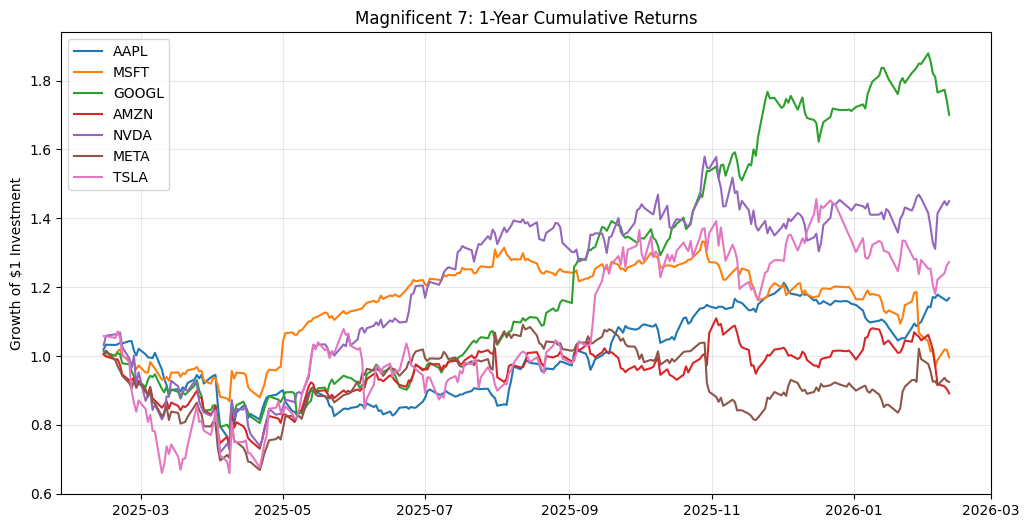

In [ ]:
#  daily returns and cumulative returns
daily_returns = data.pct_change()
cumulative_returns = (1 + daily_returns).cumprod()

# performance
plt.figure(figsize=(12, 6))
for ticker in mag7_tickers:
    plt.plot(cumulative_returns[ticker], label=ticker)

plt.title("Magnificent 7: 1-Year Cumulative Returns")
plt.ylabel("Growth of $1 Investment")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
import seaborn as sns

#mean returns and volatility
stats = pd.DataFrame({
    'Annualized Return': daily_returns.mean() * 252,
    'Annualized Volatility': daily_returns.std() * (252**0.5)
})

# Scatter plot for Risk-Reward
plt.figure(figsize=(10, 6))
sns.scatterplot(data=stats, x='Annualized Volatility', y='Annualized Return', s=200)

for i, ticker in enumerate(stats.index):
    plt.text(stats['Annualized Volatility'][i] + 0.01, stats['Annualized Return'][i], ticker)

plt.title("Risk vs. Return: Magnificent 7")
plt.xlabel("Risk (Volatility)")
plt.ylabel("Return (Annualized)")
plt.show()


In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(daily_returns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Daily Returns")
plt.show()
